# Exercise 1 - Classification to predict student admission

## Imports

In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import SGDClassifier

## Exercise steps

### a. Logistic regression classifier with linear decision boundary

#### a) Read the data from file

In a similar way as for the exercise of the previous week, read the training data from file `student-dataset-train.csv`. The first two columns are $x_{1}$ and $x_{2}$. The last column holds the class label $y$. Build the design matrix $X$ as follow:

<center>$X = \left(\begin{array}{ccc} 
        1 &   x_{1,1} & x_{1,2} \\
        1 &   \vdots  & \vdots  \\
        1 &   x_{N,1} & x_{N,2}
           \end{array}\right)$</center>

Check that the shape of $X$ is (100,3) and that the shape of $y$ is (100,).

In [39]:
# Your code here
def read_data(file):
    dataset = pd.read_csv(file, names=['x1','x2','y'])
    print(dataset.head())
    return dataset[["x1", "x2"]], dataset["y"].values

X_train, y_train = read_data("student-dataset-train.csv")

          x1         x2  y
0  34.623660  78.024693  0
1  30.286711  43.894998  0
2  35.847409  72.902198  0
3  60.182599  86.308552  1
4  79.032736  75.344376  1


#### b) Implement a z-norm normalization of the training set

You need to store the normalization values $(\mu, \sigma)$ for later as they will be needed to normalize the test set.

In [40]:
# Your code here
mu = np.mean(X_train)
sigma = np.std(X_train)
X_train = (X_train - mu) / sigma

X_train = np.c_[np.ones(X_train.shape[0]), X_train]

#### c) Implement a sigmoid function $g(z) = \frac{1}{1+e^{-z}}$

Use numpy to compute the exp so that your function can take numpy arrays as input. Check your implementation by plotting the sigmoid function.

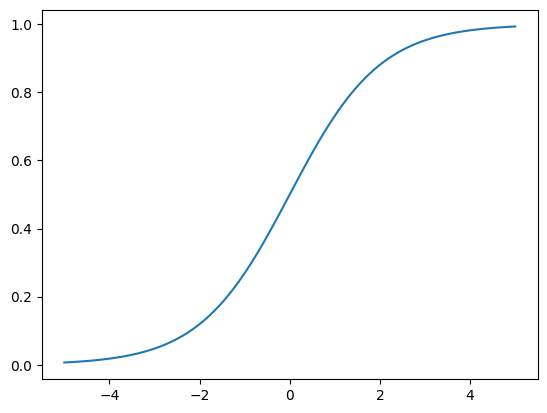

In [41]:
# Your code here
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

x = np.linspace(-5, 5, 100)
y = sigmoid(x)
plt.plot(x, y)
plt.show()

#### d) Implement the hypothesis function $h_{\theta}(\mathbf{x})$

Hint: implement it so that the computation can take the full array $X$ with $h(\mathbf{x})$ broadcasted to all training samples.

In [42]:
# Your code here
def predict(X, theta):
    return sigmoid(X.dot(theta))

#### e) Implement the objective function $J(\theta)$

<center>$J(\theta) = \frac{1}{N} \sum_{n=1}^{N} y_{n} \log h_{\theta}(\mathbf{x_{n}}) + (1-y_{n}) \log (1 - h_{\theta} (\mathbf{x_{n}}))$</center>

In [43]:
# Your code here
def cost_function(theta, X, y):
    h = np.clip(predict(X, theta), 1e-6, 1 - 1e-6)
    return 1 / len(y) * np.sum(y * np.log(h) + (1 - y) * np.log(1 - h))   

#### f) Implement the gradient ascent

In a similar way as in PW02 and PW03, implement the gradient ascent with the update rule:

<center>$\theta_{i} \leftarrow \theta_{i} + \alpha \frac{1}{N} \sum_{n=1}^{N} (y_{n} - h_{\theta}(\mathbf{x}_{n})) x_{n,i}$</center>

In [44]:
# Your code here
def gradient_ascent(X, y, theta, iterations, alpha, epsilon):
    J_history = []
    for i in range(iterations):
        theta = theta + alpha * (1 / len(y)) * np.sum(np.transpose(X).dot(y - predict(X, theta)))
        J_history.append(cost_function(X, y, theta))
        if i > 0 and (J_history[i-1] - J_history[i]) / J_history[i] < epsilon:
            break
    return theta, J_history

#### g) Test your implementation by running a gradient ascent

Hints: use a small $\alpha$. e.g. $0.001$,  store the evolution of the objective function $J(\theta)$ during the epochs to make a plot, use a large number of epochs, e.g. $2000000$.

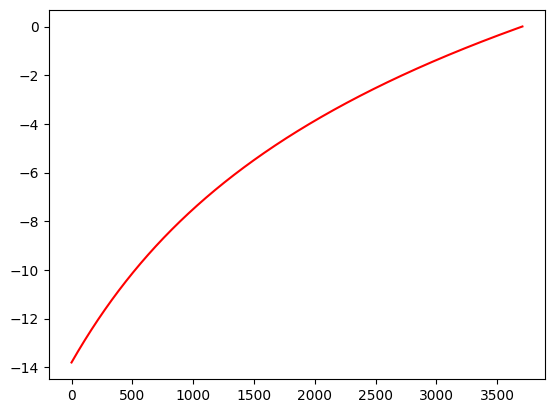

In [45]:
# Your code here
theta = np.zeros(X_train.shape[1])
theta, J_history = gradient_ascent(X_train, y_train, theta, 2000000, 0.001, 0.000001)

plt.plot(np.arange(0, len(J_history), 1), J_history, 'r')
plt.show()

#### h) Compute the correct classification rate on `student-dataset-test.csv`

Compute the correct classification rate on `student-dataset-test.csv` after convergence as you have an estimator of the posterior probabilities with:

<center>$P(y_{n}=1|\mathbf{x_{n}};\theta) = h_{\theta}(\mathbf{x_{n}})$</center>
<center>$P(y_{n}=0|\mathbf{x_{n}};\theta) = 1 - h_{\theta}(\mathbf{x_{n}})$</center>

This means that you can take the decisions $\hat{y}_{n} = 1$ if $h_{\theta}(\mathbf{x_{n}}) \geq 0.5$ and $\hat{y}_{n} = 0$ if $h_{\theta}(\mathbf{x_{n}}) < 0.5$.

In [46]:
# Your code here
def predict_test(X, theta):
    return predict(X, theta) >= 0.5

def accuracy(y, y_pred):
    return np.sum(y == y_pred) / len(y)

X_test, y_test = read_data("student-dataset-test.csv")
X_test = (X_test - mu) / sigma
X_test = np.c_[np.ones(X_test.shape[0]), X_test]

y_pred = predict_test(X_test, theta)
print("Accuracy: ", accuracy(y_test, y_pred))

          x1         x2  y
0  39.196334  78.530294  0
1  40.448499  86.839470  1
2  65.571920  44.303497  0
3  79.648113  70.806564  1
4  66.260221  41.672703  0
Accuracy:  0.9


#### i) Draw the decision boundary

Draw the decision boundary of your system on top of the scatter plot of the testing data.

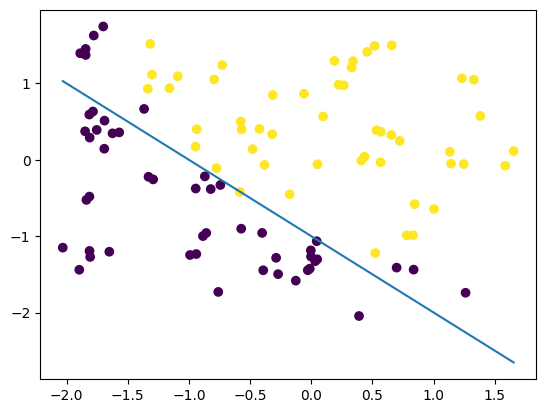

In [47]:
# Your code here
def plot_decision_boundary(X, y, theta):
    x1 = np.linspace(np.min(X[:, 1]), np.max(X[:, 1]), 100)
    x2 = -(theta[0] + theta[1] * x1) / theta[2]
    plt.scatter(X[:, 1], X[:, 2], c=y)
    plt.plot(x1,x2)
    plt.show()

plot_decision_boundary(X_test, y_test, theta)

#### j) Compare the performance

Compare the performance of the logistic regression system with the ones of previous's week.

In [48]:
# Your observation here

### b. Optional - Stochastic gradient ascent

Redo the experiments of 2.a with a stochastic gradient ascent.

In [49]:
# Your code here

### c. Logistic regression classifier with non-linear decision boundary

Redo the experiments of 2.a by increasing the complexity of the model in order to have a non-linear decision boundary:

<center>$h_{\theta}(\mathbf{x}) = g(\theta_{0} + \theta_{1} x_{1} + \theta_{2} x_{2} + \theta_{3} x_{1}^{2} + \theta_{4} x_{2}^{2} + \theta_{5} x_{1}x_{2} + \ldots)$</center>

          x1         x2  y
0  34.623660  78.024693  0
1  30.286711  43.894998  0
2  35.847409  72.902198  0
3  60.182599  86.308552  1
4  79.032736  75.344376  1


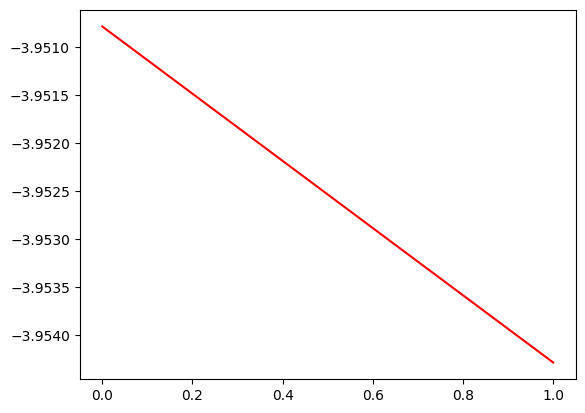

          x1         x2  y
0  39.196334  78.530294  0
1  40.448499  86.839470  1
2  65.571920  44.303497  0
3  79.648113  70.806564  1
4  66.260221  41.672703  0
Accuracy:  0.75


In [50]:
# Your code here
X_train, y_train = read_data("student-dataset-train.csv")

order = 3
X_design = np.ones(X_train.shape[0])
for i in range(1, order + 1):
    X_design = np.c_[X_design, np.power(X_train, i)]
X_train = np.copy(X_design)

mu = np.mean(X_train)
sigma = np.std(X_train)
X_train = (X_train - mu) / sigma

theta = np.zeros(X_train.shape[1])
theta, J_history = gradient_ascent(X_train, y_train, theta, 2000000, 0.001, 0.0000001)

plt.plot(np.arange(0, len(J_history), 1), J_history, 'r')
plt.show()

###

X_test, y_test = read_data("student-dataset-test.csv")

X_design = np.ones(X_test.shape[0]) #1st column (x0) is full of 1
for i in range(1, order + 1):
    X_design = np.c_[X_design, np.power(X_test, i)] #Add column of each power. 
X_test = np.copy(X_design)
X_test = (X_test - mu) / sigma

y_pred = predict_test(X_test, theta)
print("Accuracy: ", accuracy(y_test, y_pred))

### d. Using SciKit Learn

Redo one of the exercise a. or c. using SciKit Learn.

1. Read the documentation of the function `SGDClassifier()` available in the toolkit SciKit Learn. This function implements stochastic gradient descent training for different linear systems such as Logistic Regression. For a logistic regression, the `loss` parameter should be set to `"log"`.
1. Use the `fit()` and `predict()` methods of this classifier on the student data.
1. Compute the performances and compare it to your own implementations.

In [55]:
# Your code here
clf = SGDClassifier(loss="log", max_iter=2000000, tol=0.001)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
print("Accuracy: ", accuracy(y_test, y_pred))

Accuracy:  0.84


/home/thomas/.local/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:173: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(
